In [ ]:
!pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4477 sha256=b3743865be3819243a8a36cc4ecdb70736e721d354c876ab4ec4008823cc2122
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [ ]:
import tweepy

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expressionfrom textblob import TextBlob
import string
import preprocessor as p

In [ ]:
# Variables that containts the credential 
ACCESS_TOKEN = '1181611364608962561-4ealKKsBimQJrMl2EyWykD1Y5BI3aJ'
ACCESS_SECRET = 'udDixp2A2S1tHl6dhEiRgQIrXZ09GrUI08SNCN4gOOKAC'
CONSUMER_KEY = 'X8QEeyDudNE95GN3rYLrBjvdR'
CONSUMER_SECRET = 'kiUXWnxAv6YHN7vOCeCiZACzItoeAnWci2DYkp8GawylvMgdIJ'

# Setup Access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

# Create PI project
api = connect_to_twitter_OAuth()

csvFile = open('westlifeproject.csv', 'a')
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search, q = "westlife", count = 200,  show_user = True, lang = "en").items(10000):
  print(tweet.text, tweet.id, tweet.user.screen_name, tweet.created_at)
  csvWriter.writerow([tweet.text, tweet.id, tweet.user.screen_name, tweet.created_at])
csvFile.close()

Westlife - My love 1187975304062500865 senti_songs 2019-10-26 06:12:38
RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h… 1187973495839313920 yunia92 2019-10-26 06:05:27
RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne… 1187973484971905024 ifaaaaa313 2019-10-26 06:05:24
RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn… 1187973210827935746 yunia92 2019-10-26 06:04:19
I really love this song. I must say that this is one of my favorite song of Westlife.
https://t.co/q474kKv3NU 1187972955482906624 maricormanondo 2019-10-26 06:03:18
Hello my love || Westlife. 💕 1187972787224363008 Malifezswit 2019-10-26 06:02:38
Westlife’s new song 😍 1187971903392104448 yitelavendar 2019-10-26 05:59:07
I ate lunch at the same restaurant wit

In [ ]:
cp = pd.read_csv('westlifeproject.csv', sep=',', names=["tweet", "id", "username", "created_at"])
cp.head()

,tweet,id,username,created_at
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38
1,RT @MFeehilyMusic: ✨This is the most beautiful...,1187973495839313920,yunia92,2019-10-26 06:05:27
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fa...,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24
3,RT @westlifemusic: We loved shooting the video...,1187973210827935746,yunia92,2019-10-26 06:04:19
4,I really love this song. I must say that this ...,1187972955482906624,maricormanondo,2019-10-26 06:03:18


In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

cp['Remove_retweets_add'] = cp['tweet'].apply(lambda x: re.compile('https://t.co/').sub('',x,count=1).strip())
cp

,tweet,id,username,created_at,Remove_retweets_add
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38,Westlife - My love
1,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,1187973495839313920,yunia92,2019-10-26 06:05:27,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…
3,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn…,1187973210827935746,yunia92,2019-10-26 06:04:19,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…
4,I really love this song. I must say that this is one of my favorite song of Westlife.\nhttps://t.co/q474kKv3NU,1187972955482906624,maricormanondo,2019-10-26 06:03:18,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU
...,...,...,...,...,...
9506,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,1184693341755183104,Khadija_ag,2019-10-17 04:51:17,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…
9507,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,1184692422678327296,ClassicFM973,2019-10-17 04:47:38,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings
9508,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…",1184692159573721088,jelharlene1227,2019-10-17 04:46:36,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…"
9509,RT @ShaneFilanIndia: Set my heart on fire🔥💥💖💕\n\n#Westlife https://t.co/I0uncWlrSR,1184685951257202688,HadayaaZahra,2019-10-17 04:21:55,RT @ShaneFilanIndia: Set my heart on fire🔥💥💖💕\n\n#Westlife I0uncWlrSR


In [ ]:
cp['remove_rt'] = cp['Remove_retweets_add'].apply(lambda x: re.compile('RT @').sub('',x,count=1).strip())
cp

,tweet,id,username,created_at,Remove_retweets_add,remove_rt
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38,Westlife - My love,Westlife - My love
1,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,1187973495839313920,yunia92,2019-10-26 06:05:27,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…
3,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn…,1187973210827935746,yunia92,2019-10-26 06:04:19,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…
4,I really love this song. I must say that this is one of my favorite song of Westlife.\nhttps://t.co/q474kKv3NU,1187972955482906624,maricormanondo,2019-10-26 06:03:18,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU
...,...,...,...,...,...,...
9506,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,1184693341755183104,Khadija_ag,2019-10-17 04:51:17,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…
9507,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,1184692422678327296,ClassicFM973,2019-10-17 04:47:38,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings
9508,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…",1184692159573721088,jelharlene1227,2019-10-17 04:46:36,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…","mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…"
9509,RT @ShaneFilanIndia: Set my heart on fire🔥💥💖💕\n\n#Westlife https://t.co/I0uncWlrSR,1184685951257202688,HadayaaZahra,2019-10-17 04:21:55,RT @ShaneFilanIndia: Set my heart on fire🔥💥💖💕\n\n#Westlife I0uncWlrSR,ShaneFilanIndia: Set my heart on fire🔥💥💖💕\n\n#Westlife I0uncWlrSR


In [ ]:
cp['remove_uname'] = cp['remove_rt'].apply(lambda x: re.sub(r'([^\s:]+)', '', x,count=1).strip())

cp

,tweet,id,username,created_at,Remove_retweets_add,remove_rt,remove_uname
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38,Westlife - My love,Westlife - My love,- My love
1,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,1187973495839313920,yunia92,2019-10-26 06:05:27,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…
3,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn…,1187973210827935746,yunia92,2019-10-26 06:04:19,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…
4,I really love this song. I must say that this is one of my favorite song of Westlife.\nhttps://t.co/q474kKv3NU,1187972955482906624,maricormanondo,2019-10-26 06:03:18,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU
...,...,...,...,...,...,...,...
9506,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,1184693341755183104,Khadija_ag,2019-10-17 04:51:17,RT @ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,ShaneFilanIndia: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…,: IMPORTANT!! PLS LADS\n@ShaneFilan @NickyByrne @KianEganWL @MarkusFeehily @westlifemusic #Westlife \n\nPLEASE RT!! https:/…
9507,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,1184692422678327296,ClassicFM973,2019-10-17 04:47:38,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,#NowPlaying Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings,Westlife - You Make Me Feel #WakeUpCall #NocturnalClassicsWithLawrence #TheManOfTheNight #WhispersOfSweetNothings
9508,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…",1184692159573721088,jelharlene1227,2019-10-17 04:46:36,"RT @mor1019: Davao leg was moved to CEBU CITY on November 16, 2019 due to aircraft schedule conflict. \n\nFormer Westlife member, \nBrian McF…","mor1019: Davao leg was moved to CEBU CITY on November 16, 

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

cp['remove_punct'] = cp['remove_uname'].apply(lambda x: remove_punct(x))
cp.head(10)

,tweet,id,username,created_at,Remove_retweets_add,remove_rt,remove_uname,remove_punct
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38,Westlife - My love,Westlife - My love,- My love,My love
1,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,1187973495839313920,yunia92,2019-10-26 06:05:27,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,✨This is the most beautiful thing we’ve ever seen… 😭😭💖 MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,‘Cause you are my blood’ 🎶 Fanart from me to the westlifemusic Kids and thier dad ShaneFilan MarkusFeehily NickyByrne…
3,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn…,1187973210827935746,yunia92,2019-10-26 06:04:19,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,We loved shooting the video for MyBlood with those closest to us Out now nDCdHVfG httpstcooziIcWn…
4,I really love this song. I must say that this is one of my favorite song of Westlife.\nhttps://t.co/q474kKv3NU,1187972955482906624,maricormanondo,2019-10-26 06:03:18,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,really love this song I must say that this is one of my favorite song of Westlife\nqkKvNU
5,Hello my love || Westlife. 💕,1187972787224363008,Malifezswit,2019-10-26 06:02:38,Hello my love || Westlife. 💕,Hello my love || Westlife. 💕,my love || Westlife. 💕,my love Westlife 💕
6,Westlife’s new song 😍,1187971903392104448,yitelavendar,2019-10-26 05:59:07,Westlife’s new song 😍,Westlife’s new song 😍,new song 😍,new song 😍
7,"I ate lunch at the same restaurant with Shane Westlife a few years ago. He was by himself, looked tired. I was fang… https://t.co/IV0GaSt8uf",1187971152469098496,ryourise,2019-10-26 05:56:08,"I ate lunch at the same restaurant with Shane Westlife a few years ago. He was by himself, looked tired. I was fang… IV0GaSt8uf","I ate lunch at the same restaurant with Shane Westlife a few years ago. He was by himself, looked tired. I was fang… IV0GaSt8uf","ate lunch at the same restaurant with Shane Westlife a few years ago. He was by himself, looked tired. I was fang… IV0GaSt8uf",ate lunch at the same restaurant with Shane Westlife a few years ago He was by himself looked tired I was fang… IVGaStuf
8,RT @goss_ie: Mark Feehily reveals first glimpse of his baby girl in new Westlife music video https://t.co/u29dReOLrQ ht

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

cp['remove_tokenized'] = cp['remove_punct'].apply(lambda x: tokenization(x.lower()))
cp.head()

,tweet,id,username,created_at,Remove_retweets_add,remove_rt,remove_uname,remove_punct,remove_tokenized
0,Westlife - My love,1187975304062500865,senti_songs,2019-10-26 06:12:38,Westlife - My love,Westlife - My love,- My love,My love,"[, my, love]"
1,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,1187973495839313920,yunia92,2019-10-26 06:05:27,RT @MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,MFeehilyMusic: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,: ✨This is the most beautiful thing we’ve ever seen… 😭😭💖 @MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,✨This is the most beautiful thing we’ve ever seen… 😭😭💖 MarkusFeehily and his baby daughter Layla… 😍 We can’t cope… ❤️ h…,"[, this, is, the, most, beautiful, thing, we, ve, ever, seen, markusfeehily, and, his, baby, daughter, layla, we, can, t, cope, h, ]"
2,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,1187973484971905024,ifaaaaa313,2019-10-26 06:05:24,RT @Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,Tastygirll: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,: ‘Cause you are my blood’ 🎶 #Fanart from me to the @westlifemusic Kids and thier dad. @ShaneFilan @MarkusFeehily @NickyByrne…,‘Cause you are my blood’ 🎶 Fanart from me to the westlifemusic Kids and thier dad ShaneFilan MarkusFeehily NickyByrne…,"[, cause, you, are, my, blood, fanart, from, me, to, the, westlifemusic, kids, and, thier, dad, shanefilan, markusfeehily, nickybyrne, ]"
3,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! https://t.co/nD86CdHVfG https://t.co/oziIcWn…,1187973210827935746,yunia92,2019-10-26 06:04:19,RT @westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,westlifemusic: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,: We loved shooting the video for #MyBlood with those closest to us. Out now! nD86CdHVfG https://t.co/oziIcWn…,We loved shooting the video for MyBlood with those closest to us Out now nDCdHVfG httpstcooziIcWn…,"[, we, loved, shooting, the, video, for, myblood, with, those, closest, to, us, out, now, ndcdhvfg, httpstcooziicwn, ]"
4,I really love this song. I must say that this is one of my favorite song of Westlife.\nhttps://t.co/q474kKv3NU,1187972955482906624,maricormanondo,2019-10-26 06:03:18,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,I really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,really love this song. I must say that this is one of my favorite song of Westlife.\nq474kKv3NU,really love this song I must say that this is one of my favorite song of Westlife\nqkKvNU,"[really, love, this, song, i, must, say, that, this, is, one, of, my, favorite, song, of, westlife, qkkvnu]"


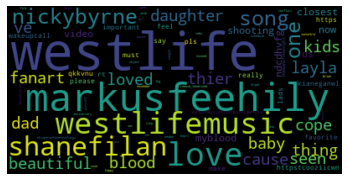

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
# Start with one review:
hasil = cp['remove_tokenized']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(hasil))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
doc = nlp("piinkmaan, girls, listen, westlife, john, leg")

for tok in doc:
  print(tok.text, "...", tok.dep_)

piinkmaan ... ROOT
, ... punct
girls ... npadvmod
, ... punct
listen ... conj
, ... punct
westlife ... npadvmod
, ... punct
john ... conj
, ... punct
leg ... conj


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
cp['remove_tokenized'].sample(5)

2862                                                                                                                            [westlifemore, than, words]
4387    [, this, really, is, a, special, song, amp, even, more, a, special, video, had, such, a, fun, day, making, it, with, my, children, something, to, ]
8166                                                                                                          [, nate, dogg, rip, akon, westlife, lpdibhxn]
1275                             [, look, at, these, strikingly, gorgeous, guys, so, intense, shanefilan, nickybyrne, kianeganwl, markusfeehily, westlif, ]
6314               [who, listen, to, westlife, or, john, legend, can, never, break, your, heart, but, you, see, those, cardi, b, fans, fear, the, kbabfyyv]
Name: remove_tokenized, dtype: object

In [ ]:
get_entities("Me and my squad on our way to the Coldplay concert next tour")

['Me', 'Coldplay concert']

In [ ]:
cp['tweet_string'] = cp['remove_tokenized'].astype('str')

In [ ]:
entity_pairs = []

for i in tqdm(cp['tweet_string']):
  entity_pairs.append(get_entities(i))

100%|██████████| 9511/9511 [02:36<00:00, 60.84it/s]


In [ ]:
entity_pairs

[['', ''],
 ['baby  we', ''],
 ['you', 'kids'],
 ['we', 'us'],
 ['this', 'westlife'],
 ['', ''],
 ['', ''],
 ['himself  i', 'ago  he'],
 ['', 'westlife  video'],
 ['also  rel', 'also  parents'],
 ['', 'westlife  fans'],
 ['', 'it'],
 ['this', 'westlife'],
 ['you', 'exclusively  video'],
 ['this', 'westlife  children'],
 ['we', 'us'],
 ['', 'wayyyyyy  sorry'],
 ['', 'radio'],
 ['', 'track  ht'],
 ['stream  stream', 'you  amazing'],
 ['', ''],
 ['', 'youtube'],
 ['we', 'us'],
 ['', ''],
 ['stream  stream', 'you  amazing'],
 ['', 'just  westlife'],
 ['', 'westlifes  children'],
 ['we', 'us'],
 ['', ''],
 ['you', 'kids'],
 ['', ''],
 ['we', 'us'],
 ['', ''],
 ['classic  rock', 'wan'],
 ['classic  rock', 'wan'],
 ['classic  rock', 'wan'],
 ['', 'first  newborn'],
 ['now  it', 'now  all'],
 ['', 'mtiusdqwq'],
 ['you', 'exclusively  video'],
 ['them  all', 'filans'],
 ['you', 'exclusively  video'],
 ['feehilys  baby', 'mark'],
 ['we', 'us'],
 ['you', 'i'],
 ['', ''],
 ['', 'always  me'],
 ['w

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx



In [ ]:
get_relation("John completed the task")

'completed'

In [ ]:
relations = [get_relation(i) for i in tqdm(cp['tweet_string'])]

100%|██████████| 9511/9511 [02:36<00:00, 60.97it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

break         2195
is            1218
loved          423
be             227
won            186
westlife       167
thank          165
say            151
[              140
,              139
are            138
''             135
enjoyed        129
was            119
have           107
go             106
love            83
look            77
re              72
know            69
playing         54
let             51
s               50
has             49
flew            49
youtube         47
song            45
come            43
think           40
listen          40
miss            38
were            37
believe         37
raise           36
get             35
spotify         32
got             30
been            28
wait            27
myblood         26
make            26
see             25
makes           24
so              24
lets            23
picks           23
show            23
wanna           21
found           20
kianeganwl      20
dtype: int64

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
relations

['love',
 'is',
 'are',
 'loved',
 'say',
 '[',
 'song',
 'ate',
 'reveals',
 'is',
 'has',
 'swear',
 'is',
 'thank',
 'is',
 'loved',
 'pito',
 'listening',
 'spotify',
 'come',
 'daddydaughter',
 'westlife',
 'loved',
 'youtube',
 'come',
 'hit',
 'ang',
 'loved',
 'youtube',
 'are',
 'westlife',
 'loved',
 'westlife',
 'lay',
 'lay',
 'lay',
 '[',
 'is',
 'reposted',
 'thank',
 'is',
 'thank',
 'lkvxmdtl',
 'loved',
 'love',
 'be',
 'makes',
 'got',
 'look',
 'lkvxmdtl',
 'is',
 'is',
 'come',
 'yyoemmqkib',
 'is',
 'thank',
 'is',
 'go',
 'youtube',
 'ang',
 'loved',
 'is',
 'watching',
 ',',
 'loved',
 'have',
 'is',
 'thank',
 'love',
 'playing',
 'thank',
 'loved',
 'zqnmlzcob',
 'is',
 'loved',
 'say',
 'leave',
 'song',
 'managed',
 'is',
 'come',
 'is',
 'daddydaughter',
 'is',
 'thank',
 'is',
 'is',
 'release',
 'rocco',
 'makes',
 'oltrsou',
 'daddydaughter',
 "''",
 'playlist',
 'loved',
 'love',
 'loved',
 'loved',
 "''",
 'download',
 'pict',
 'youtube',
 'look',
 'tha

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12508 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_te

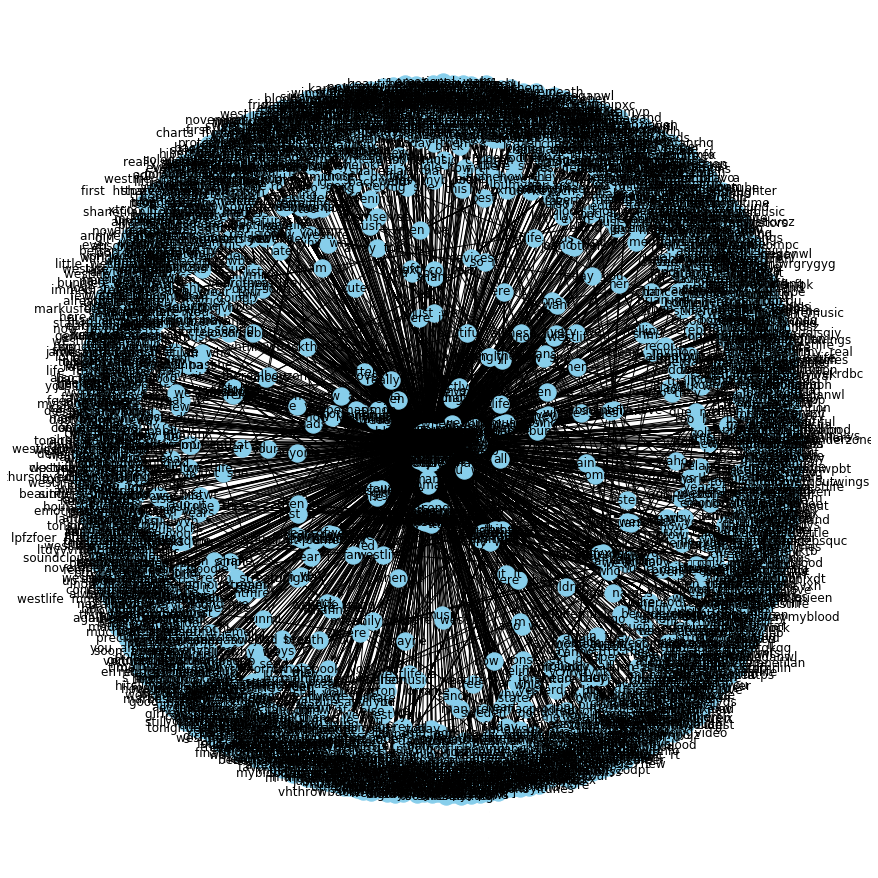

In [ ]:
plt.figure(figsize=(12,12))

pos=nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_camp=plt.cm.Blues, pos=pos)
plt.show()

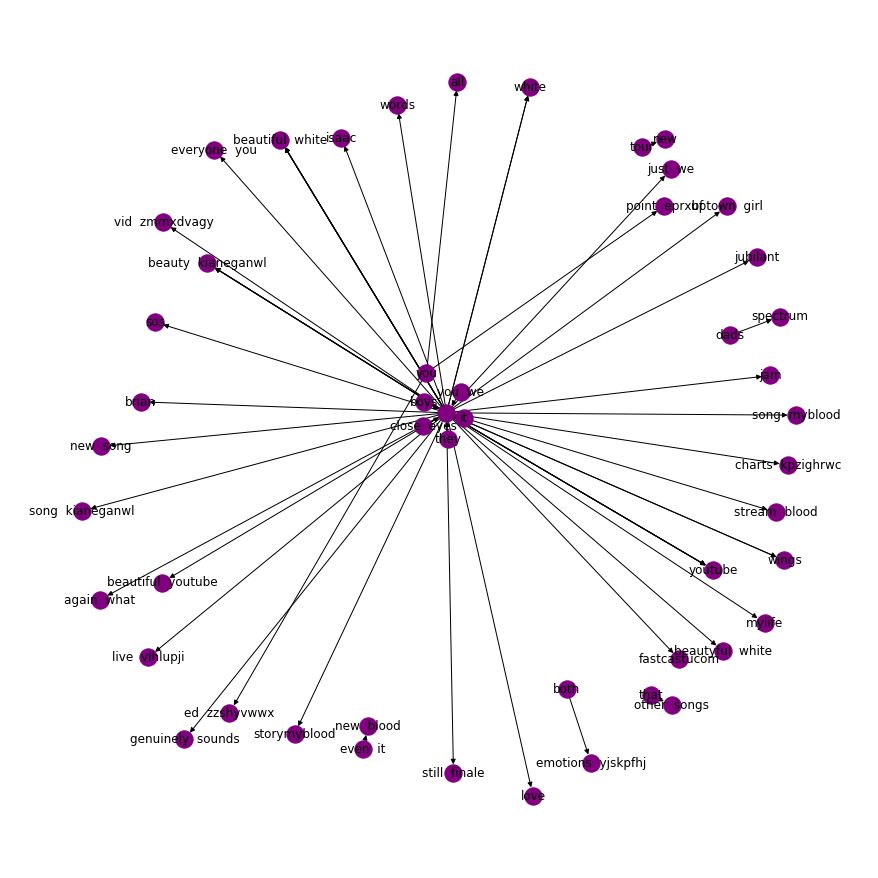

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="westlife"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos=nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='purple', edge_camp=plt.cm.Blues, pos=pos)
plt.show()

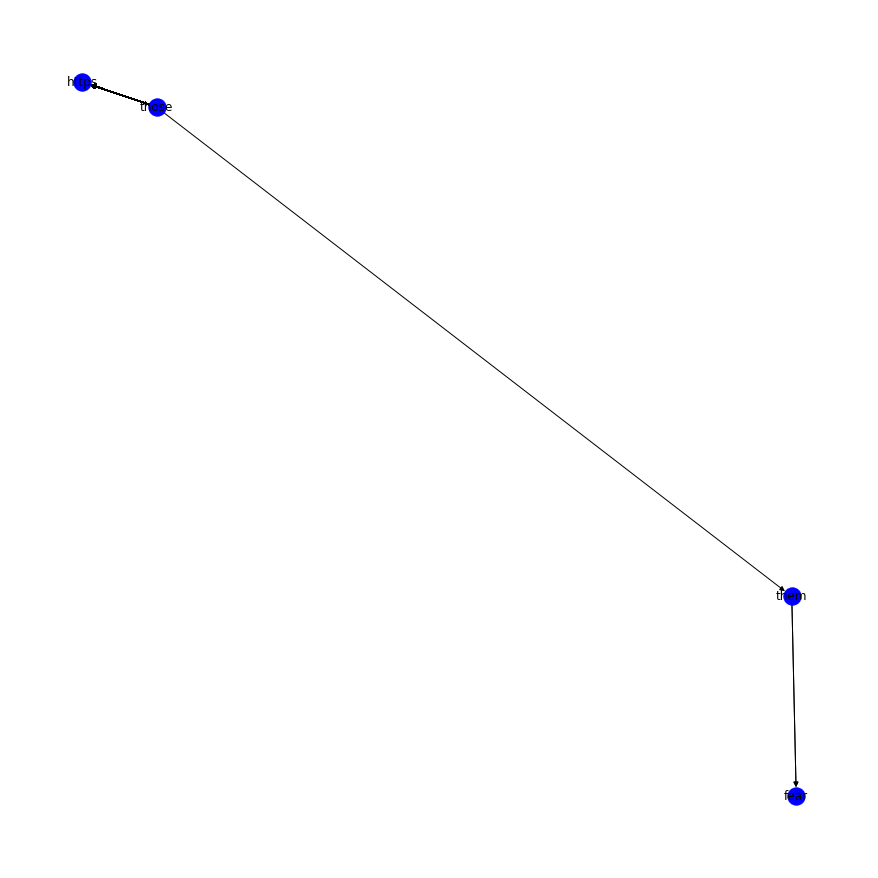

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="break"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos=nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='blue', edge_camp=plt.cm.Blues, pos=pos)
plt.show()
